In [1]:
from google.colab import files
files.upload()


Saving auto-mpg.csv to auto-mpg.csv
Saving StudentsPerformance.csv to StudentsPerformance.csv


{'auto-mpg.csv': b"mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name\r\n18,8,307,130,3504,12,70,1,chevrolet chevelle malibu\r\n15,8,350,165,3693,11.5,70,1,buick skylark 320\r\n18,8,318,150,3436,11,70,1,plymouth satellite\r\n16,8,304,150,3433,12,70,1,amc rebel sst\r\n17,8,302,140,3449,10.5,70,1,ford torino\r\n15,8,429,198,4341,10,70,1,ford galaxie 500\r\n14,8,454,220,4354,9,70,1,chevrolet impala\r\n14,8,440,215,4312,8.5,70,1,plymouth fury iii\r\n14,8,455,225,4425,10,70,1,pontiac catalina\r\n15,8,390,190,3850,8.5,70,1,amc ambassador dpl\r\n15,8,383,170,3563,10,70,1,dodge challenger se\r\n14,8,340,160,3609,8,70,1,plymouth 'cuda 340\r\n15,8,400,150,3761,9.5,70,1,chevrolet monte carlo\r\n14,8,455,225,3086,10,70,1,buick estate wagon (sw)\r\n24,4,113,95,2372,15,70,3,toyota corona mark ii\r\n22,6,198,95,2833,15.5,70,1,plymouth duster\r\n18,6,199,97,2774,15.5,70,1,amc hornet\r\n21,6,200,85,2587,16,70,1,ford maverick\r\n27,4,97,88,2130,14.5,70,3,datsun pl510\r\

SUBASRI R 24BAD116 EXP3


/tmp/ipython-input-3473448134.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


MSE: 207.91715060774996
RMSE: 14.419332529897144
R2 Score: 0.030085923188504338
                       Feature  Coefficient
0  parental level of education    -1.006718
1      test preparation course    -3.840039


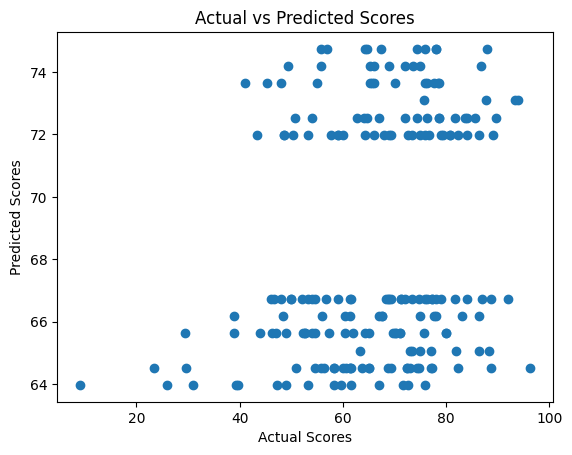

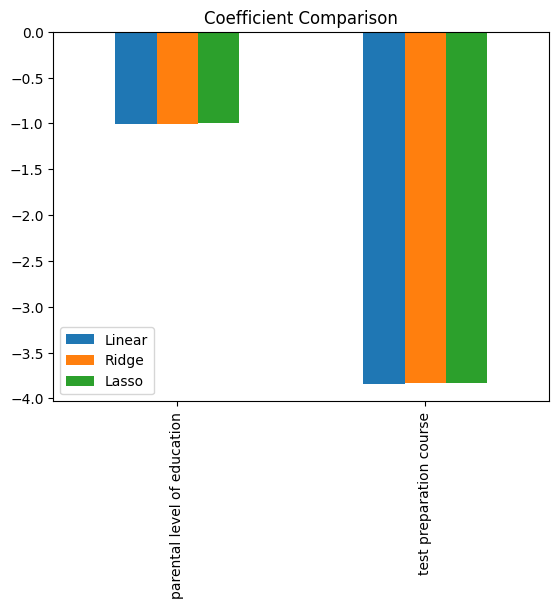

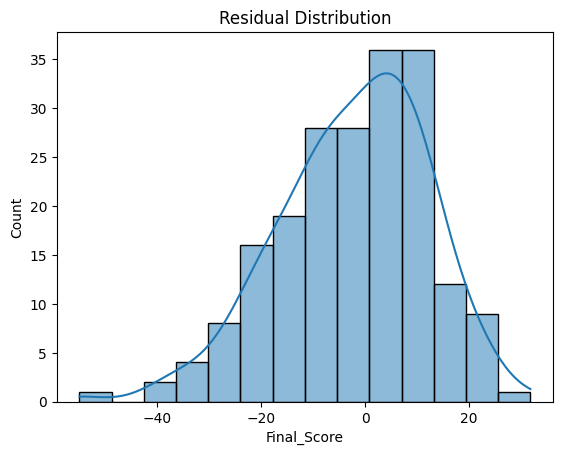

In [2]:
print("SUBASRI R 24BAD116 EXP3")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv("StudentsPerformance.csv")

df['Final_Score'] = (df['math score'] +
                     df['reading score'] +
                     df['writing score']) / 3

le = LabelEncoder()
df['parental level of education'] = le.fit_transform(df['parental level of education'])
df['test preparation course'] = le.fit_transform(df['test preparation course'])

X = df[['parental level of education', 'test preparation course']]
y = df['Final_Score']

X.fillna(X.mean(), inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print(coeff_df)


ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)


plt.scatter(y_test, y_pred)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Scores")
plt.show()

coeff_compare = pd.DataFrame({
    "Linear": model.coef_,
    "Ridge": ridge.coef_,
    "Lasso": lasso.coef_
}, index=X.columns)

coeff_compare.plot(kind="bar")
plt.title("Coefficient Comparison")
plt.show()

residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()


SUBASRI R 24BAD116 EXP3

Polynomial Degree 2
MSE: 13.760855128148345
RMSE: 3.709562659957147
R2 Score: 0.7440623896917427


/tmp/ipython-input-958916477.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)


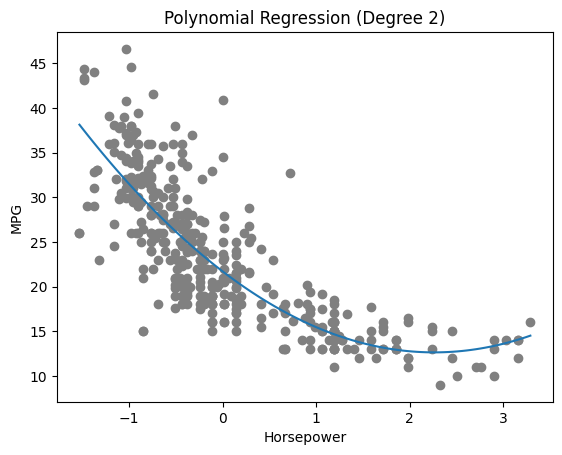


Polynomial Degree 3
MSE: 13.813374257350006
RMSE: 3.7166348027954004
R2 Score: 0.7430855884466042


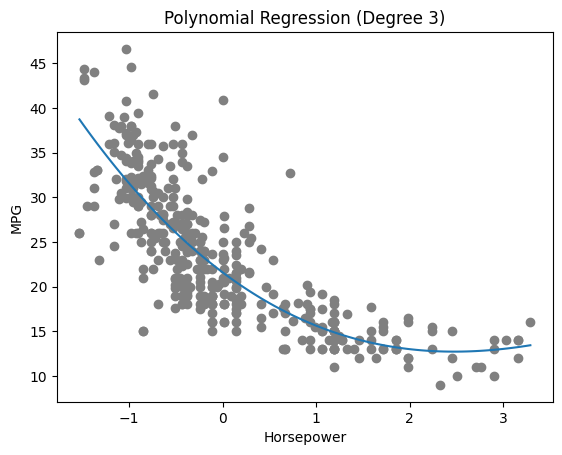


Polynomial Degree 4
MSE: 14.11802402282965
RMSE: 3.757395909779757
R2 Score: 0.7374194192854786


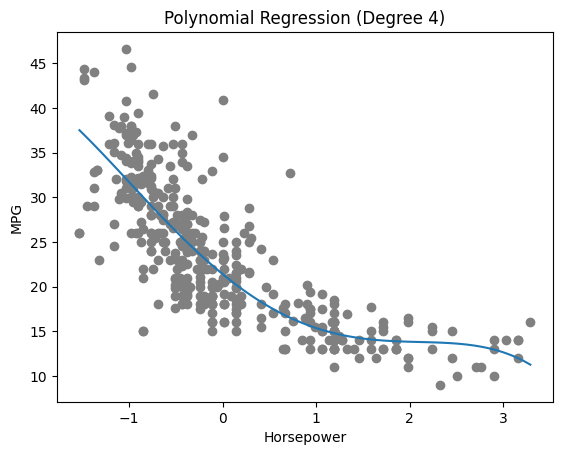

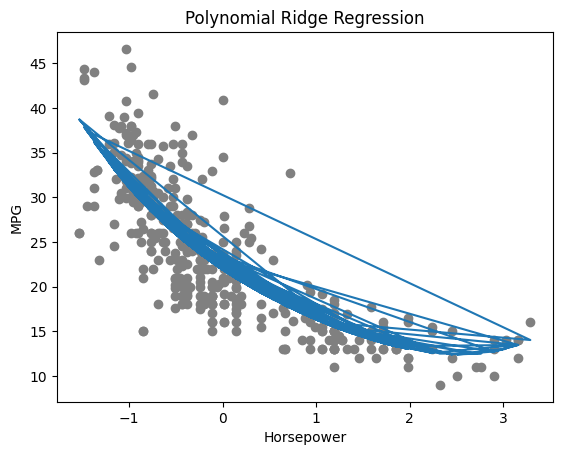

In [3]:

# SCENARIO 2: POLYNOMIAL REGRESSION
print("SUBASRI R 24BAD116 EXP3")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("auto-mpg.csv")


df['horsepower'] = df['horsepower'].replace('?', np.nan).astype(float)
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)


X = df[['horsepower']]
y = df['mpg']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

degrees = [2, 3, 4]

for d in degrees:
    print(f"\nPolynomial Degree {d}")

    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred = model.predict(X_test_poly)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2 Score:", r2)


    X_range = np.linspace(X_scaled.min(), X_scaled.max(), 100).reshape(-1, 1)
    X_range_poly = poly.transform(X_range)
    y_range_pred = model.predict(X_range_poly)

    plt.scatter(X_scaled, y, color='gray')
    plt.plot(X_range, y_range_pred)
    plt.xlabel("Horsepower")
    plt.ylabel("MPG")
    plt.title(f"Polynomial Regression (Degree {d})")
    plt.show()


poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X_scaled)

ridge = Ridge(alpha=10)
ridge.fit(X_poly, y)

y_ridge_pred = ridge.predict(X_poly)

plt.scatter(X_scaled, y, color='gray')
plt.plot(X_scaled, y_ridge_pred)
plt.title("Polynomial Ridge Regression")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.show()
